In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading Data from the IMDB Dataset

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/imdb_labelled.txt",delimiter='\t', header=None, names=['text', 'label'])

In [ ]:
import pandas as pd

data = pd.read_csv("imdb_labelled.txt",delimiter='\t', header=None, names=['text', 'label'])

In [ ]:
data

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


check for the various target labels in our dataset using seaborn.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


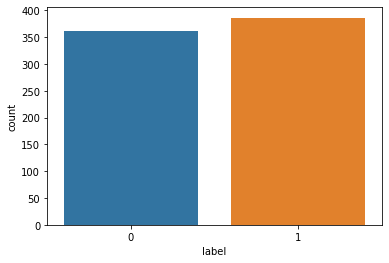

In [ ]:
import seaborn as sns
sns.countplot(data.label)

In [ ]:
data['label']

0      0
1      0
2      0
3      0
4      1
      ..
743    0
744    0
745    0
746    0
747    0
Name: label, Length: 748, dtype: int64

Cleaning the data

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import string
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np
import re


def preprocessing(data_text_column):
  corpus = []
  # i=0
  for sentence in data_text_column:
    sentence = re.sub('[^a-zA-Z]',' ',str(sentence))
    sentence = re.sub('<[^<]+?>', ' ',str(sentence))
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [ps.stem(word) for word in sentence if word not in set(stopwords.words('english')) and word not in punct]
    corpus.append(' '.join(str(x) for x in sentence))
    # i+=1
    # if(i==10):
    #   break
  return corpus


In [ ]:
ps=PorterStemmer()
corpus = preprocessing(data['text'])
corpus

['slow move aimless movi distress drift young man',
 'sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost non exist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head',
 'rest movi lack art charm mean empti work guess empti',
 'wast two hour',
 'saw movi today thought good effort good messag kid',
 'bit predict',
 'love cast jimmi buffet scienc teacher',
 'babi owl ador',
 'movi show lot florida best made look appeal',
 'song best muppet hilari',
 'cool',
 'right case movi deliv everyth almost right face',
 'averag act main person low budget clearli see',
 'review long overdu sinc consid tale two sister singl greatest film ever made',
 'put gem movi term screenplay cinematographi act post product edit direct aspect film make',
 'practic perfect true masterpiec sea faux masterpiec',
 'structur film easili tightli construct histori cinema think film so

DATA VISUALIZATION

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = ""
for row in corpus:
    for word in row:
        wordcloud+=" ".join(word)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',min_font_size = 10).generate(wordcloud)

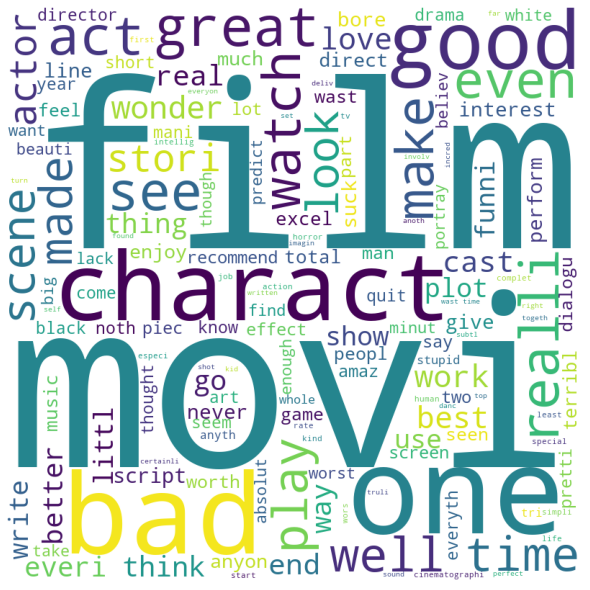

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
y=data['label']

Using Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=300, random_state=0)  
text_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300, random_state=0)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))


[[44 40]
 [ 9 57]]
              precision    recall  f1-score   support

           0       0.83      0.52      0.64        84
           1       0.59      0.86      0.70        66

    accuracy                           0.67       150
   macro avg       0.71      0.69      0.67       150
weighted avg       0.72      0.67      0.67       150

0.6733333333333333


Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=0).fit(X_train, y_train)
model.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
model.score(X_test, y_test)

0.7866666666666666

Using Naive Bayes Algorithm

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
clf= MultinomialNB()



In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8133333333333334

In [ ]:
list = ["slow-boring film"]

In [ ]:
vect = vectorizer.transform(list).toarray()

In [ ]:
clf.predict(vect)

array([0])